In [32]:
## Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy
scipy.__version__

'1.9.3'

## Question One: 
---
Do smokers have higher insurance charges than non-smokers?

H1 - Smokers do have higher insurance charges due to their increased health risks and costs

H0 - Smokers experience similar charges to non smokers

The data is numeric and the there are two samples/groups to compare (average charge of smokers versus the average charge of non-smokers). I will be using a 2 sample T-Test because of this. 

In [4]:
## Loading in Data
df= pd.read_csv("Data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
## Creating filtered dataframes and showing descriptive statistics
df_smokers = df.loc[df["smoker"] == "yes"]
df_smokers.describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


In [15]:
## Creating filtered dataframes and showing descriptive statistics
df_nonsmokers = df.loc[df["smoker"] == "no"]
df_nonsmokers.describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


### Testing Assumptions 
---



In [22]:
## Testing if there are signfigcant outliers
smoker_outliers = np.abs(stats.zscore(df_smokers["charges"])) > 3
smoker_outliers.sum()

0

In [23]:
## Testing if there are signfigcant outliers
nonsmoker_outliers = np.abs(stats.zscore(df_nonsmokers["charges"])) > 3
nonsmoker_outliers.sum()

24

In [24]:
## Removing outliers from nonsmoking group
df_nonsmokers = df_nonsmokers.loc[~nonsmoker_outliers]

In [25]:
## Testing smoking group for normality
results_smoker = stats.normaltest(df_smokers["charges"])
results_smoker.pvalue

5.564930630036463e-14

In [26]:
## Testing nonsmoking group for normality
results_nonsmoker = stats.normaltest(df_nonsmokers["charges"])
results_nonsmoker.pvalue

2.6945416315543976e-36

In [29]:
len(df_smokers["charges"]), len(df_nonsmokers["charges"])

(274, 1040)

The two groups are large enough to safely ignore the assumption of normality 

In [34]:
## Testing for equal variance
results = stats.levene(df_smokers["charges"], df_nonsmokers["charges"])
if results.pvalue < 0.05:
    print("The groups do not have equal variance")
else: 
    print("The groups do have equal variance ")

The groups do not have equal variance


We met the assumption for normality, but not the assumption of equal variance. Therefore we will run Welch's t-test.

### Hypothesis Test
---


In [39]:
final_result = stats.ttest_ind(df_smokers["charges"], df_nonsmokers["charges"], equal_var = False)
print(final_result)
final_result.pvalue < 0.05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)


True

In [41]:
df_smokers["charges"].mean()

32050.23183153284

In [42]:
df_nonsmokers["charges"].mean()

7939.8608446721155

### Results
---

    - We have a p-value less than 0.05 so we reject the null hypothesis. The smokers did receive on average a higher charge. 

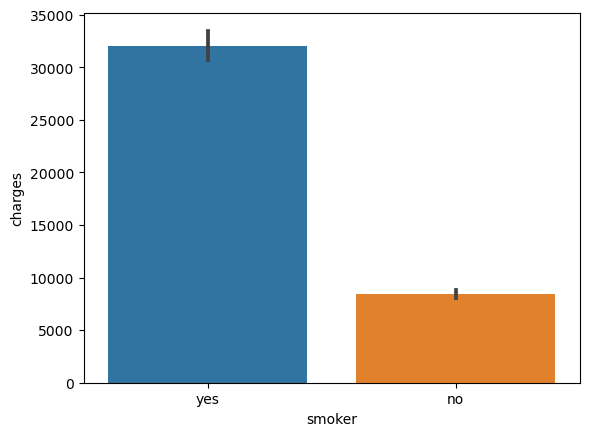

In [54]:
## Creating visulization 
sns.barplot(data = df, x = "smoker", y = "charges");

## Question Two 
---

Are men more likely to smoke than women? 

H1 - There is a relationship between gender and smoking

H0 - There is no relationship between gender and smoking

We are comparing a binary target (smoking) versus two categorical groups (men and women) so therefore I will use the chi-squared test. 

In [50]:
## Creating crosstab to group sex by smoking
table = pd.crosstab(df["sex"], df["smoker"])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [52]:
## Running Chi^2 test 
final_result_2 = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = final_result_2
print(p)

0.006548143503580696


### Results
---

    - We have a p-value less than 0.05 so we reject the null hypothesis. There is a significant link between gender and smoking rates. 

## Question Three
---
Do different regions have different charges on average?

H1 - There is a relationship between region and average charge

H0 - There is no relationship between region and average charge

The different regions represent categorical data, but their average is numeric and since there is more than 2 an ANOVA test is appropriate. 

### Testing Assumptions
---

In [62]:
## Grouping data for testing 
groups = {}
for i in df["region"].unique():
    data = df.loc[df["region"] == i, "charges"].copy()
    
    groups[i] = data

groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [63]:
## Testing normal distribution assumption
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [64]:
## Checking significance
norm_results_df["sig"] = norm_results_df["p"] < 0.5
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


Each group is normally distributed. 

In [66]:
## Testing assumption of equal variance
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

Each group has an equal variance. 

In [68]:
## One wave ANOVA test
results_anova = stats.f_oneway(*groups.values())
results_anova

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

### Results
- We have a p-value less than 0.05 so we reject the null hypothesis. There is a significant link between region and charges. 

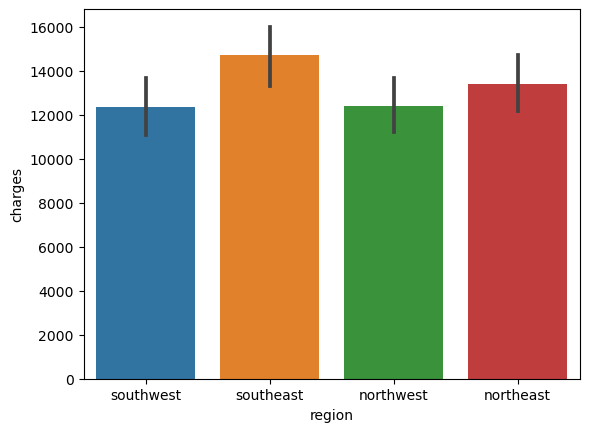

In [69]:
## Data visualization
sns.barplot(data = df, x = "region", y = "charges");